# install

## I 

In [4]:
# Install (versions compatibles + évite le package `keras` standalone)
%pip install -U pip setuptools wheel
%pip install -U tabulate scikit-learn pandas numpy matplotlib seaborn gensim "tensorflow==2.16.1"

# Test TensorFlow (ne fait pas planter le notebook si l'environnement Windows manque de DLL)
try:
	import tensorflow as tf
	print("TensorFlow:", tf.__version__)
	print(tf.reduce_sum(tf.random.normal([1000, 1000])))
except Exception as e:
	print("TensorFlow n'a pas pu se charger (runtime natif / DLL).")
	print("Erreur:", repr(e))
	print("\nPistes courantes (Windows):")
	print(" - Installer/mettre à jour 'Microsoft Visual C++ Redistributable 2015-2022 (x64)'")
	print(" - Éviter Python du Microsoft Store: utiliser python.org/conda + nouveau venv")
	print(" - CPU trop ancien (AVX requis): utiliser un autre environnement (WSL/conda) ou une build no-AVX")

Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.
TensorFlow: 2.16.1
tf.Tensor(936.428, shape=(), dtype=float32)


## Si echec - diagnostic

In [1]:
# Diagnostic TensorFlow (sortie courte, utile sous Windows)
import sys, platform, site, pathlib, traceback

print("Python:", sys.version.replace("\n", " "))
print("Executable:", sys.executable)
print("Platform:", platform.platform())
print("Machine:", platform.machine())

site_paths = []
try:
    site_paths = site.getsitepackages()
except Exception:
    site_paths = [site.getusersitepackages()]
print("Site-packages:")
for p in site_paths:
    print(" -", p)

# Cherche des traces d'une install cassée (ex: dossier '~ensorflow' -> warning pip)
for p in site_paths:
    base = pathlib.Path(p)
    if base.exists():
        bad = sorted([x.name for x in base.glob("~ensorflow*")])
        if bad:
            print("\nTraces suspectes dans", str(base))
            for name in bad:
                print(" -", name)

print("\nTest import tensorflow...")
try:
    # Évite un vieux module resté en mémoire après uninstall/reinstall
    for k in list(sys.modules.keys()):
        if k == "tensorflow" or k.startswith("tensorflow.") or k.startswith("keras") or k.startswith("tensorboard"):
            sys.modules.pop(k, None)

    import tensorflow as tf
    print("tensorflow module:", tf)
    print(" - __file__:", getattr(tf, "__file__", None))
    spec = getattr(tf, "__spec__", None)
    if spec is not None:
        print(" - spec.origin:", spec.origin)
        print(" - spec.submodule_search_locations:", list(spec.submodule_search_locations or []))
    print("OK TensorFlow:", tf.__version__)
except Exception as e:
    print("ECHEC import TensorFlow:", repr(e))
    print("\nTraceback (résumé):")
    print(traceback.format_exc())

Python: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
Executable: c:\Users\FX506\AppData\Local\Programs\Python\Python310\python.exe
Platform: Windows-10-10.0.19045-SP0
Machine: AMD64
Site-packages:
 - c:\Users\FX506\AppData\Local\Programs\Python\Python310
 - c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages

Test import tensorflow...
tensorflow module: <module 'tensorflow' from 'c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\__init__.py'>
 - __file__: c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\__init__.py
 - spec.origin: c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\__init__.py
 - spec.submodule_search_locations: ['c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow', 'c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\

## Si echec - cleanup

In [ ]:
# Cleanup TensorFlow/Keras (corrige les résidus type `~ensorflow` + réinitialise l'install)
# À exécuter si l'import TF est cassé / warnings pip `Ignoring invalid distribution ~ensorflow`
import sys, site, pathlib, shutil

print("Python executable:", sys.executable)
if "WindowsApps" in sys.executable:
    print("⚠️ Python Microsoft Store détecté : c'est une source fréquente de soucis avec TF. ")
    print("   Recommandé: Python depuis python.org/Miniconda + venv, puis re-sélectionner le kernel.")

# 1) Désinstall propre via pip (dans le kernel courant)
%pip uninstall -y tensorflow tensorflow-intel tensorflow-cpu keras keras-nightly tensorboard tensorboard-data-server tensorflow-estimator

# 2) Suppression des résidus dans le site-packages UTILISATEUR (pas dans WindowsApps)
user_sp = pathlib.Path(site.getusersitepackages())
print("User site-packages:", user_sp)

patterns = [
    "~ensorflow*", "tensorflow", "tensorflow-*dist-info", "tensorflow_*dist-info",
    "~keras*", "keras", "keras-*dist-info",
    "tensorboard", "tensorboard-*dist-info", "tensorboard_data_server*",
    "tensorflow_estimator*", "tensorflow_io_gcs_filesystem*"
 ]

removed = []
if user_sp.exists():
    for pat in patterns:
        for path in user_sp.glob(pat):
            try:
                if path.is_dir():
                    shutil.rmtree(path, ignore_errors=True)
                else:
                    path.unlink(missing_ok=True)
                removed.append(str(path))
            except Exception as e:
                print("Impossible de supprimer", path, "->", repr(e))
else:
    print("User site-packages introuvable (", user_sp, ")")

print("\nSupprimé (résumé):")
if removed:
    for p in removed[:50]:
        print(" -", p)
    if len(removed) > 50:
        print(f" ... +{len(removed)-50} autres")
else:
    print("(rien à supprimer, ou déjà propre)")

print("\nEnsuite:")
print("1) Redémarre le kernel")
print("2) Relance la cellule Install (TensorFlow==2.16.1)")
print("3) Relance la cellule Diagnostic")

# Partie 1: 

## Imports

In [16]:
# Suppression des avertissements liés à Scikit-learn
import warnings # Masquer les avertissements (ex. : FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Librairies générales
import pandas as pd # Librairie pour la manipulation de données
import numpy as np # Librairie pour le calcul numérique
import sys # Fonctions et variables liées à l'interpréteur Python
import copy # Création de copies d'objets
from numpy import mean, std # Fonctions de calcul de moyenne et d'écart type
import zipfile # Traitement de fichiers zip
import os # Manipulation de fichiers et chemins
# Librairie affichage
import matplotlib.pyplot as plt # Outils de visualisation 2D
from matplotlib import pyplot # Interface de la bibliothèque Matplotlib
import seaborn as sns # Bibliothèque de visualisation de données basée sur Matplotlib
# Scikit-learn pour l'évaluation des modèles
from sklearn.metrics import confusion_matrix # Matrice de confusion
from sklearn.model_selection import KFold # Outils de validation croisée
from sklearn.metrics import accuracy_score # Calcul de l'accuracy
from sklearn.model_selection import train_test_split # Découpage train/test
# TensorFlow et Keras
import tensorflow as tf # Librairie de deep learning
import keras # API haut niveau pour construire et entraîner des modèles de deeplearning
from keras import layers # Modules de couches pour construire des modèles Keras
from keras import models # Outils pour créer des modèles Keras
from keras import optimizers # Outils d'optimisation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Générateurd'images pour l'augmentation des données
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # Rappels pour le suivi et l'arrêt précoce
from keras.layers import Input, Dense, Dropout, Flatten, Lambda # Types de couches Keras
from keras.layers import Conv2D, MaxPooling2D # Couches convolutionnelles et de pooling
from keras.preprocessing import image # Outils de prétraitement d'images
from tensorflow.keras.models import Model, load_model # Définition / chargement de modèles
from keras.datasets import fashion_mnist # Jeu de données Fashion MNIST
from tensorflow.keras.utils import to_categorical # Conversion en encodage one-hot
from tensorflow.keras.optimizers import SGD # Optimiseur Stochastic Gradient Descent
from tensorflow.keras.applications.resnet50 import ResNet50 # Modèle ResNet50␣pré-entraîné
from tensorflow.keras.preprocessing import image # Prétraitement d'images pour les modèles Keras

In [17]:
def plot_curves(histories):
    """
    Fonction pour afficher les courbes de loss et d'accuracy moyennées et écart-types à travers les k-folds.
    Paramètres :
        - histories (list) : Historique d'entraînement des différents plis K-folds.
    """
    # Initialisation des figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Extraction du nombre d'époques d'après l'un des historiques
    epochs = range(len(histories[0].history['loss']))
    # Calcul des moyennes et des écart-types pour chaque époque
    mean_loss = np.mean([history.history['loss'] for history in histories],axis=0)
    std_loss = np.std([history.history['loss'] for history in histories],axis=0)
    mean_val_loss = np.mean([history.history['val_loss'] for history in histories],axis=0)
    std_val_loss = np.std([history.history['val_loss'] for history in histories],axis=0)
    mean_accuracy = np.mean([history.history['accuracy'] for history in histories],axis=0)
    std_accuracy = np.std([history.history['accuracy'] for history in histories],axis=0)
    mean_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories],axis=0)
    std_val_accuracy = np.std([history.history['val_accuracy'] for history in histories],axis=0)
    # Couleurs pour les courbes
    train_color = 'blue'
    val_color = 'orange'
    # Courbes de loss avec moyenne et écart-type
    ax1.plot(epochs, mean_loss, color=train_color, label='Train')
    ax1.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=train_color, alpha=0.2)
    ax1.plot(epochs, mean_val_loss, color=val_color, label='Validation')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color=val_color, alpha=0.2)
    # Courbes d'accuracy avec moyenne et écart-type
    ax2.plot(epochs, mean_accuracy, color=train_color, label='Train')
    ax2.fill_between(epochs, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, color=train_color, alpha=0.2)
    ax2.plot(epochs, mean_val_accuracy, color=val_color, label='Validation')
    ax2.fill_between(epochs, mean_val_accuracy - std_val_accuracy, mean_val_accuracy + std_val_accuracy,
    color=val_color, alpha=0.2)
    # Titres, labels et légendes
    ax1.set_title(f'Loss (k={len(histories)})')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.set_title(f'Accuracy (k={len(histories)})')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

Imports et fonctions plot_curves définies, maintenant on télécharge les dataSets

In [18]:
# Définition du répertoire cible
model_dir = "./cnn_models/"
# Création du répertoire s'il n'existe pas
os.makedirs(model_dir, exist_ok=True)
zip_file = "cnn_models.zip"
#!wget https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip
!Powershell.exe -Command ((new-object System.Net.WebClient).DownloadFile('https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip','cnn_models.zip'))

# Extraction du fichier ZIP
with zipfile.ZipFile(zip_file, "r") as zip_ref: 
    zip_ref.extractall(model_dir)
# Suppression du fichier ZIP après extraction pour économiser de l'espace
os.remove(zip_file)

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [20]:
print("Nombre d'exemples du jeu d'apprentissage : ", X_train.shape[0])
print("Nombre d'exemples du jeu de test : ", X_test.shape[0])
print ("Format du jeu d'apprentissage : ", X_train.shape)
print ("Format du jeu de test : ", X_test.shape)
print ("Format d'une image", X_train[0].shape)

Nombre d'exemples du jeu d'apprentissage :  60000
Nombre d'exemples du jeu de test :  10000
Format du jeu d'apprentissage :  (60000, 28, 28)
Format du jeu de test :  (10000, 28, 28)
Format d'une image (28, 28)


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

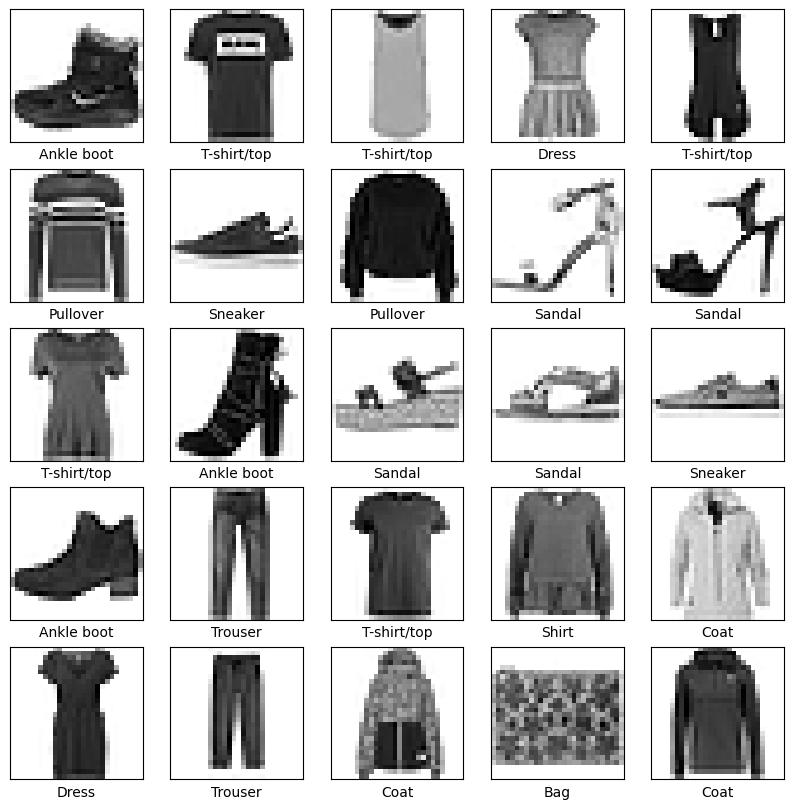

In [22]:
#Visualisation d'images
plt.figure(figsize=(10,10))
columns = 25
for i in range(columns):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

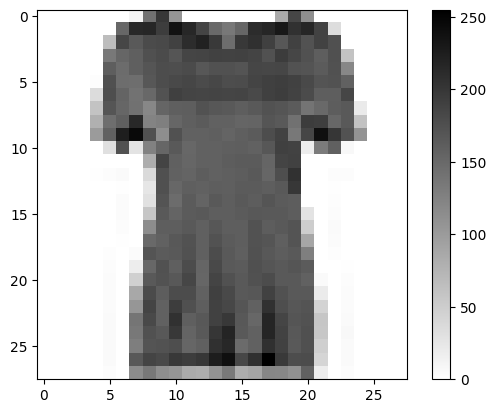

In [23]:
numimage=10
plt.figure()
plt.imshow(X_train[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
# Sauvegarde des données avant transformation
X_train_original=copy.deepcopy(X_train)
X_test_original=copy.deepcopy(X_test)
train_images = X_train / 255.0
test_images = X_test / 255.0

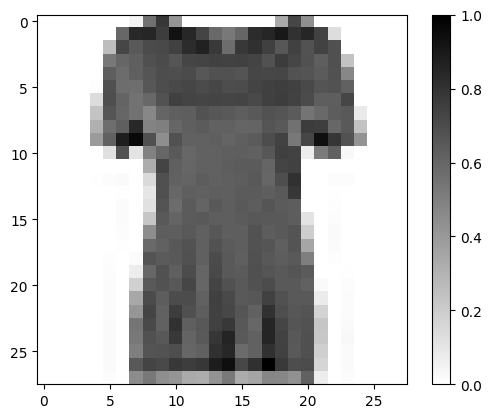

In [25]:
numimage=10
plt.figure()
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Modèle Baseline

In [ ]:
def load_dataset():
    """
        Charge et prépare le jeu de données Fashion MNIST pour l'entraînement
        Étapes :
        - Chargement des ensembles d'entraînement et de test.
        - Reshape pour ajouter un canal (passage de 28x28 à 28x28x1).
        - Encodage des étiquettes en one-hot.
        Retourne :
        - X_train : données d'entraînement reshaped (échantillons, 28, 28, 1).
        - y_train : étiquettes d'entraînement encodées en one-hot.
        - X_test : données de test reshaped (échantillons, 28, 28, 1).
        - y_test : étiquettes de test encodées en one-hot.
    """
    # Chargement des données Fashion MNIST
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # Redimensionnement des images pour inclure un canal unique (28x28x1)
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    # Encodage one-hot des étiquettes de classe
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test
def clean_data(train, test):
    """
        Prétraitement des données : conversion en float, normalisation entre 0 et 1.
        Paramètres :
        - train : tableau de données d'entraînement
        - test : tableau de données de test
        Retourne :
        - train_norm : données d'entraînement normalisées
        - test_norm : données de test normalisées
    """
    # Conversion des entiers en floats pour permettre la normalisation
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalisation des valeurs entre 0 et 1
    train_norm /= 255.0
    test_norm /= 255.0
    return train_norm, test_norm

### Architecture du modèle
Nous définissons un modèle de base simple, composé des éléments suivants :
- Une couche d'entrée pour des images de taille 28x28 avec un seul canal  
- Une couche Conv2D avec 32 filtres de taille 3x3 et une activation ReLU  
- Une couche de pooling de taille 2x2 pour réduire la dimension spatiale  
- Une opération de flatten pour transformer les données en vecteur  
- Une couche dense de 100 neurones avec une activation ReLU  
- Une couche de sortie avec 10 neurones et une activation softmax pour la classification

In [ ]:
def define_model(shapeinput=(28, 28, 1)):
    # Couche d'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # Couche convolutionnelle avec pooling
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="Conv2D_1")(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPooling2D_1")(x)

    # Flatten pour préparer les données pour la partie dense
    x = Flatten(name="Flatten")(x)

    # Couches denses pour la classification
    x = Dense(100, activation='relu', name="Dense_1")(x)
    outputs = Dense(10, activation='softmax', name="Output")(x)
    model = Model(inputs=inputs, outputs=outputs, name="Baseline_CNN")

    # Compilation du modèle
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
def evaluate_model(model, dataX, dataY, folds=5, epochs=10):
    """
        Évalue le modèle avec une validation croisée K-fold.
        Paramètres :
            - model : modèle de réseau de neurones Keras à évaluer.
            - dataX : données d'entrée pour l'entraînement et la validation.
            - dataY : étiquettes de sortie correspondantes.
            - folds : nombre de splits pour la validation croisée.
            - epochs : nombre d'époques pour l'entraînement de chaque split.
            Retourne :
            - scores : liste des scores d'accuracy du modèle pour chaque split.
            - histories : liste des historique d'entraînement pour chaque split.
    """
    scores, histories = [], [] # Initialisation des scores et historiques
    kfold = KFold(n_splits=folds, shuffle=True, random_state=1)
    
    # Itération sur chaque split généré par le K-fold
    for train_ix, test_ix in kfold.split(dataX):

        # Sélection des données d'entraînement et de test pour le fold
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]

        # Réinitialisation du modèle avant chaque itération
        model = define_model()

        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
        validation_data=(X_test, y_test), verbose=1)

        # Évaluation du modèle sur les données de test actuelles
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        print(f'Précision : {acc * 100:.3f}%')

        # Stockage de l'historique
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
def run_evaluation(folds, epochs):
    """
        Fonction d'évaluation

        Cette fonction effectue les étapes suivantes :
            1. Chargement du jeu de données Fashion MNIST.
            2. Prétraitement des données : nettoyage et normalisation.
            3. Initialisation du modèle de base et affichage de sa structure.
            4. Évaluation du modèle avec validation croisée (K-fold).
            5. Affichage des courbes de performance et des statistiques de précision.

        Paramètres :
            - folds (int) : Nombre de splits pour la validation croisée (K-fold).
            - epochs (int) : Nombre d'époques d'entraînement pour chaque pli du K-fold.

        Retourne :
            - None
    """

    # Chargement du jeu de données d'entraînement et de test
    X_train, y_train, X_test, y_test = load_dataset()

    # Prétraitement des données : nettoyage et normalisation
    X_train, X_test = clean_data(X_train, X_test)

    # Initialisation du modèle de base
    model = define_model()
    print(model.summary())

    # Évaluation du modèle
    scores, histories = evaluate_model(model, X_train, y_train, folds, epochs)

    # Affichage des courbes de performance
    plot_curves(histories)

    # Affichage des statistiques de précision : moyenne et écart-type
    print(f'Précision : moyenne={mean(scores) * 100:.3f}% écart-type={std(scores) * 100:.3f}%, k={len(scores)}')

Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8169 - loss: 0.5091 - val_accuracy: 0.8676 - val_loss: 0.3636
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8829 - loss: 0.3264 - val_accuracy: 0.8850 - val_loss: 0.3169
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8965 - loss: 0.2813 - val_accuracy: 0.8984 - val_loss: 0.2812
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9081 - loss: 0.2499 - val_accuracy: 0.9042 - val_loss: 0.2645
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9173 - loss: 0.2242 - val_accuracy: 0.9033 - val_loss: 0.2588
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9251 - loss: 0.2023 - val_accuracy: 0.9003 - val_loss: 0.2757
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9308 - loss: 0.1833 - val_accuracy: 0.9110 - val_loss: 0.2526
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9376 - loss: 0.16

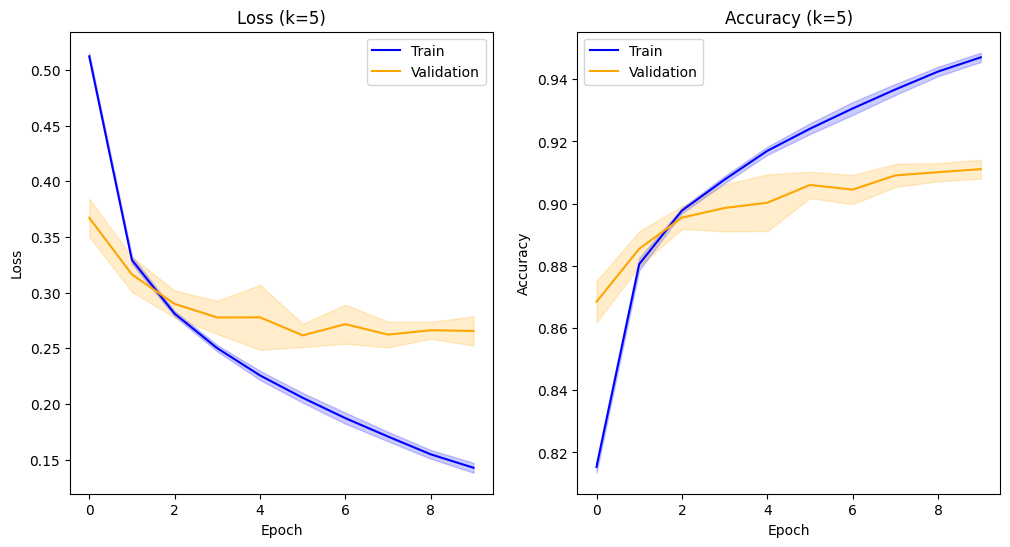

Précision : moyenne=91.110% écart-type=0.304%, k=5


In [26]:
k=5 # Nombre de folds
epochs=10 # Nombre d'epochs
shapeinput=(28, 28, 1) # Format de l'image 28x28 sur 1 canal
run_evaluation(k,epochs)

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold">Model: "Baseline_CNN"</span>
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (<span style="color: #0087ff; text-decoration-color: #0087ff">InputLayer</span>)        │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">28</span>, <span style="color: #00af00; text-decoration-color: #00af00">28</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>)      │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">26</span>, <span style="color: #00af00; text-decoration-color: #00af00">26</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │           <span style="color: #00af00; text-decoration-color: #00af00">320</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">MaxPooling2D</span>)   │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (<span style="color: #0087ff; text-decoration-color: #0087ff">Flatten</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">5408</span>)           │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                 │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">100</span>)            │       <span style="color: #00af00; text-decoration-color: #00af00">540,900</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                  │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">10</span>)             │         <span style="color: #00af00; text-decoration-color: #00af00">1,010</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Total params: </span><span style="color: #00af00; text-decoration-color: #00af00">542,230</span> (2.07 MB)
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">542,230</span> (2.07 MB)
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Non-trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">0</span> (0.00 B)
</pre>
None
Epoch 1/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 6ms/step - accuracy: 0.7876 - loss: 0.5889 - val_accuracy: 0.8432 - val_loss: 0.4313
Epoch 2/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8648 - loss: 0.3758 - val_accuracy: 0.8778 - val_loss: 0.3394
Epoch 3/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 6ms/step - accuracy: 0.8861 - loss: 0.3172 - val_accuracy: 0.8864 - val_loss: 0.3206
Epoch 4/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8968 - loss: 0.2850 - val_accuracy: 0.8879 - val_loss: 0.3091
Epoch 5/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.9039 - loss: 0.2597 - val_accuracy: 0.8939 - val_loss: 0.2939
Précision : 89.393%
Epoch 1/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 5ms/step - accuracy: 0.7864 - loss: 0.5872 - val_accuracy: 0.8524 - val_loss: 0.4060
Epoch 2/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8702 - loss: 0.3605 - val_accuracy: 0.8783 - val_loss: 0.3410
Epoch 3/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m7s[0m 7ms/step - accuracy: 0.8884 - loss: 0.3096 - val_accuracy: 0.8848 - val_loss: 0.3156
Epoch 4/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 6ms/step - accuracy: 0.9010 - loss: 0.2720 - val_accuracy: 0.8889 - val_loss: 0.3051
Epoch 5/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 6ms/step - accuracy: 0.9105 - loss: 0.2444 - val_accuracy: 0.8883 - val_loss: 0.3108
Précision : 88.833%
<Figure size 1200x600 with 2 Axes>
Précision : moyenne=89.113% écart-type=0.280%, k=2

## Analyse du modèle


In [27]:
model = define_model()
print(model.summary())

Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None


### Analyse de chaque couche
L'architecture du réseau, telle que décrite dans le model.summary(), montre les dimensions de sortie et le nombre de paramètres associés à chaque couche.
#### Couche de Convolution : CONV2D_1  :
La première couche de convolution, CONV2D_1, a une sortie de dimension (None, 26, 26, 32).  
Les images d'entrée mesurent 28x28 avec un canal (1).Nombre de filtres : 32 (K=32), taille des filtres : (3, 3) (F=3), pas de padding (P=0), et stride de 1 (S=1).
Les dimensions de sortie pour la couche convolutionnelle sont calculées avec les formules :
$$ W2 = \frac{(W1 - F + 2 \cdot P)}{S} + 1 $$
$$ H2 = \frac{(H1 - F + 2 \cdot P)}{S} + 1 $$
$$ D2 = K $$
Ainsi :
$$W2 = \frac{(28−3+2⋅0)}{1}​ + 1 = 26$$
$$H2 = \frac{(28−3+2⋅0)​}{1} + 1 = 26$$
$$D2 = 32$$
Le nombre de paramètres d'une couche de convolution dépend du nombre de filtres et de la taille du filtre.
Chaque filtre de taille (3,3) et d'un canal unique a 3 x 3 + 1 = 10 paramètres (9 pour le filtre et 1 pour le biais). Avec 32 filtres, le nombre total de paramètres est : $$ 32 \times 10 = 320 $$
#### Couche de Max Pooling : MaxPooling2D_1
La couche de max pooling, MaxPooling2D_1, réduit la dimension de l'image en sortie à (None, 13, 13, 32).  
En entrée, on a W2=26, H2=26, et D2=32 (issue de la couche de convolution).
Le pool_size est (2,2), et strides n'est pas spécifié (strides=None). En Keras, cela signifie que strides=pool_size, donc S=2.
Les dimensions de sortie sont donc :
$$W3=\frac{(26−2+2⋅0)​}{2}+1=13$$
$$H3=\frac{(26−2+2⋅0)​}{2}+1=13$$
$$D3=32$$
Cette couche n'apprend pas de paramètres, car elle effectue simplement une réduction de la taille.
#### Couche Flatten
La couche Flatten transforme la sortie (None, 13, 13, 32) en un vecteur de dimension (None, 5408). Cette valeur est calculée comme suit :
$$ 13 \times 13 \times 32 = 5408 $$
La couche Flatten n'a aucun paramètre à apprendre : elle ne fait qu'aplatir les données.
#### Couche Dense : Dense_1
La première couche dense (Dense_1) possède 100 neurones et est connectée à la couche flatten de dimension 5408. Elle a donc (5408 + 1) x 100 paramètres :  5408 paramètres pour chaque connexion avec un neurone, 100 biais.
Le nombre total de paramètres est donc :
$$ (5408 \times 100) + 100 = 540900 $$
#### Couche de Sortie : Output
La couche de sortie (Output) contient 10 neurones, correspondant aux 10 classes de classification.
Elle est connectée à Dense_1 avec 100 neurones, donc elle a (100 + 1) x 10 paramètres : 100 connexions par neurone,10 biais.
Le nombre total de paramètres est :
$$ (10 \times 100) + 10 = 1010 $$
Au total, le modèle comporte 542 230 paramètres à apprendre. On remarque que la majorité d'entre eux se trouvent dans la partie dense du réseau, en fin de modèle, i.e. celle qui s'occupe de la classification.

### Analyse des résultats de l'apprentissage
Le modèle actuel montre des signes de sur-apprentissage : en observant la courbe de perte (loss), on voit que la courbe pour le jeu d'entraînement (en bleu) continue de baisser tandis que celle pour le jeu de test (en rouge) cesse de diminuer autour de l'epoch 3. Pour limiter ce phénomène, nous avons vu dans le notebook sur keras différentes techniques de régularisation qui peuvent être utilisées :
#### - Augmentation des données : 
Augmenter la taille du jeu d'entraînement en appliquant des transformations aléatoires (par exemple, rotation, décalage, zoom) aide le modèle à généraliser. Cela ajoute de la diversité aux données et réduit le risque de sur-apprentissage. Nous utiliserons ce type de transformation dans la section concernant ImageDataGenerator.Ajout de dropout : le dropout désactive aléatoirement un pourcentage de neurones pendant l'entraînement, ce qui empêche le modèle de trop se spécialiser sur les exemples du jeu d'entraînement. Un dropout de 50 % peut être ajouté comme suit :

```python
 x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)  # Désactive aléatoirement 50 % des neurones
``` 
#### Régularisation L2 : 
la régularisation L2 ajoute une pénalité pour les poids trop élevés :

```python
Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01))  # L2 avec facteur 0.01
``` 
#### - Réduction du taux d'apprentissage (learning rate) : 
Un taux d'apprentissage plus faible ralentit la convergence. On peut, par exemple utiliser une fonction callback ReduceLROnPlateau :
```python
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
```
#### Callback pour réduire le taux d'apprentissage si la perte de validation stagne
```python
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3) 
```
#### - Ajustement de la taille des batchs : 
une taille de batch plus petite favorise la généralisation car les gradients sont calculés plus fréquemment.

> Lorsqu'on souhaite augmenter l'accuracy d'un modèle de réseau de neurones, outre les approches précédentes qui évitent le sur-apprensissage, plusieurs stratégies peuvent être appliquées :
#### Utilisation du padding : 
le padding consiste à ajouter des pixels autour de l'image d'entrée afin de préserver les dimensions et de ne pas perdre d'informations en bordure. Cela permet au modèle de capturer les caractéristiques proches des bords de l'image. Keras offre deux options pour le padding :
- "valid" : Aucun remplissage n'est appliqué, ce qui est la valeur par défaut. Les dimensions de sortie diminuent après chaque couche de convolution.
- "same" : Remplit les bords de l'entrée avec des zéros de manière uniforme pour maintenir la taille de l'entrée et de la sortie identiques lorsque strides=1.
Par exemple, une couche Conv2D avec un padding configuré pourrait être implémentée ainsi :
```python
Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding="same",
                 input_shape=(28, 28, 1),
                 name="Conv2D_1")
``` 
#### Augmentation de la profondeur du réseau : 
ajouter des couches de convolution ou des couches entièrement connectées peut permettre au modèle d'apprendre des caractéristiques plus complexes. Toutefois, il faut faire attention au sur-apprentissage.
```python
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
``` 
#### Fine-tuning d'un modèle pré-entraîné : 
le fine-tuning consiste à utiliser un modèle pré-entraîné (par exemple, ResNet) et à l'adapter à la tâche spécifique. Cela peut améliorer l'accuracy de manière significative surtout si le jeu de données est similaire à celui du modèle pré-entraîné. Nous verrons comment l'utiliser dans la section sur le transfer learning.

## ImageDataGenerator

```python
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,                # Centrer les données en soustrayant la moyenne
    samplewise_center=False,                 # Centrer chaque échantillon
    featurewise_std_normalization=False,     # Normaliser les données en divisant par l'écart-type
    samplewise_std_normalization=False,      # Normaliser chaque échantillon
    zca_whitening=False,                     # Appliquer le blanchiment ZCA
    zca_epsilon=1e-06,                      # Epsilon pour le blanchiment ZCA
    rotation_range=0,                        # Plage de degrés pour les rotations aléatoires
    width_shift_range=0.0,                  # Fraction de la largeur totale pour les décalages horizontaux aléatoires
    height_shift_range=0.0,                 # Fraction de la hauteur totale pour les décalages verticaux aléatoires
    brightness_range=None,                   # Plage pour les ajustements aléatoires de luminosité
    shear_range=0.0,                         # Angle de cisaillement dans le sens antihoraire
    zoom_range=0.0,                          # Plage pour le zoom aléatoire
    channel_shift_range=0.0,                 # Décalage des canaux de couleur
    fill_mode='nearest',                     # Les points en dehors des limites sont remplis selon le mode choisi
    cval=0.0,                                # Valeur utilisée pour les points en dehors des limites lorsque fill_mode est 'constant'
    horizontal_flip=False,                   # Retourner aléatoirement les entrées horizontalement
    vertical_flip=False,                     # Retourner aléatoirement les entrées verticalement
    rescale=None,                            # Facteur de mise à l'échelle
    preprocessing_function=None,             # Fonction qui sera appliquée à chaque image
    data_format=None,                        # Format des données d'image, soit 'channels_last' soit 'channels_first'
    validation_split=0.0,                   # Fraction des données réservée pour la validation
    dtype=None                               # Type de données
)
```

In [30]:
X_train, y_train, X_test, y_test = load_dataset()
# nettoyage et normalisation des données
X_train, X_test = clean_data(X_train, X_test)

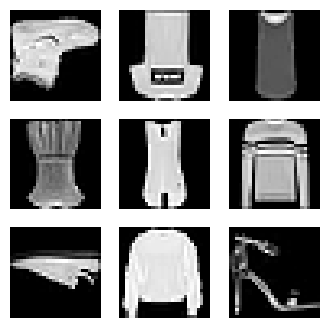

In [31]:
# ImageDataGenerator avec flip horizontal et vertical
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

for X_batch, y_batch in datagen.flow(X_train, y_train,
                                     batch_size=9, shuffle=False):
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))

    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i * 3 + j].reshape(28, 28),
                            cmap=plt.get_cmap("gray"))
            ax[i][j].axis('off')

    plt.show()
    break

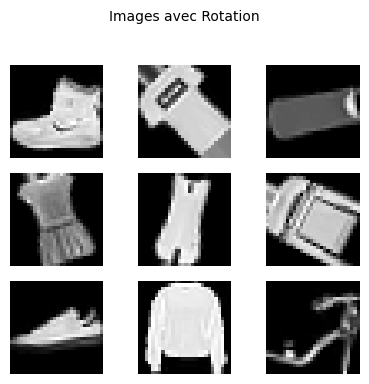

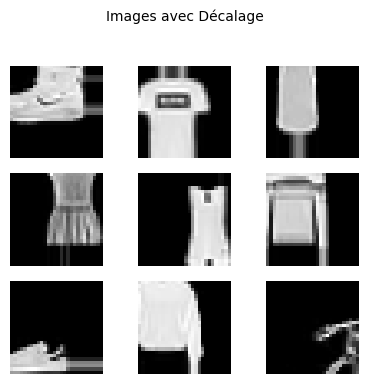

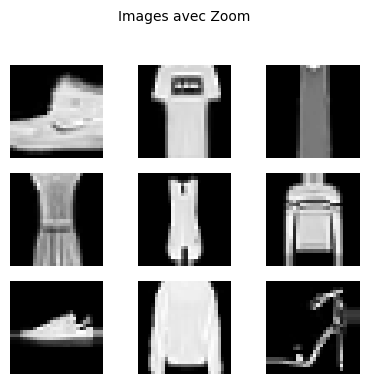

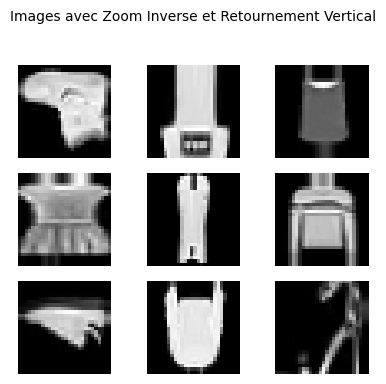

In [32]:
def plot_augmented_images(X_train, y_train, augmentation_params,
                          title, batch_size=9):
    """
    Fonction pour afficher des images augmentées avec les paramètres spécifiés.

    Paramètres :
    - X_train (array) : Ensemble d'images d'entraînement.
    - y_train (array) : Étiquettes des images d'entraînement.
    - augmentation_params (dict) : Paramètres d'augmentation .
    - title (str) : Titre du subplot pour la série d'images.
    - batch_size (int) : Taille du batch à afficher.
    """

    # ImageDataGenerator avec les paramètres fournis
    datagen = ImageDataGenerator(**augmentation_params)

    # Récupération d'un batch d'images augmentées
    for X_batch, y_batch in datagen.flow(X_train, y_train,
                                         batch_size=batch_size, shuffle=False):
        fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
        fig.suptitle(title, fontsize=10)

        for i in range(3):
            for j in range(3):
                ax[i][j].imshow(X_batch[i * 3 + j].reshape(28, 28),
                                cmap=plt.get_cmap("gray"))
                ax[i][j].axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
        break


# Rotation
plot_augmented_images(X_train, y_train, {'rotation_range': 80},
                      title='Images avec Rotation')

# Décalage
shift = 0.4
plot_augmented_images(X_train,
                      y_train,
                      {'width_shift_range': shift, 'height_shift_range': shift},
                      title='Images avec Décalage')

# Zoom
zoom_range = 0.4
plot_augmented_images(X_train, y_train, {'zoom_range': zoom_range},
                      title='Images avec Zoom')

# Zoom inverse et retournement vertical
plot_augmented_images(X_train,
                      y_train, {'zoom_range': 0.4, 'vertical_flip': True},
                      title='Images avec Zoom Inverse et Retournement Vertical')

flow est un itérateur, ce qui signifie qu'il peut générer des images à l'infini !
```python
flow(
    x,                        # Données d'entrée (images) à générer en batch.
    y=None,                  # Étiquettes correspondantes (facultatif, utilisé si vous avez des labels).
    batch_size=32,           # Taille du batch à générer (nombre d'échantillons par batch).
    shuffle=True,            # Indique si les échantillons doivent être mélangés (True) ou non (False).
    sample_weight=None,      # Poids à appliquer aux échantillons, si nécessaire (facultatif).
    seed=None,               # Valeur de départ pour la génération aléatoire, utile pour la reproductibilité.
    save_to_dir=None,        # Répertoire dans lequel les images générées seront sauvegardées (facultatif).
    save_prefix='',          # Préfixe à ajouter aux noms des fichiers d'images sauvegardées.
    save_format='png',       # Format d'image dans lequel les images seront sauvegardées (par défaut, 'png').
    subset=None              # Sous-ensemble à utiliser si les données sont divisées en 'train' et 'validation' (facultatif).
)
```

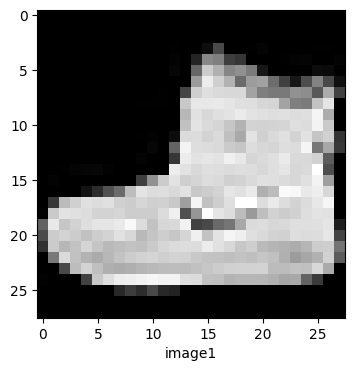

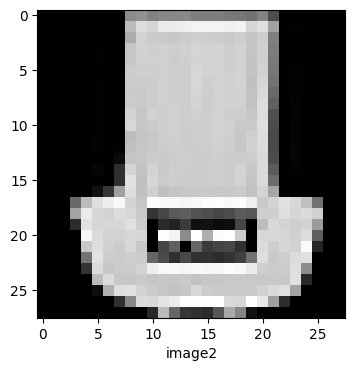

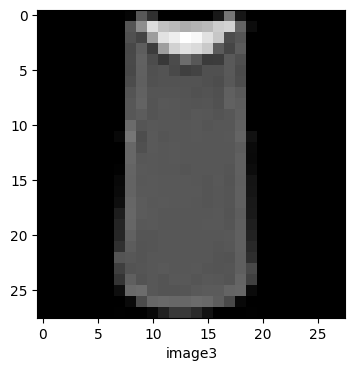

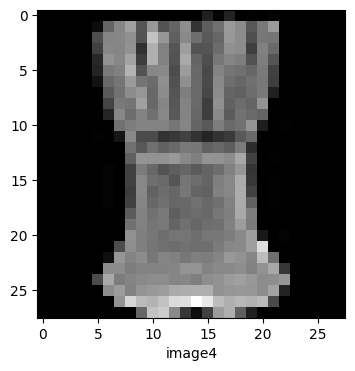

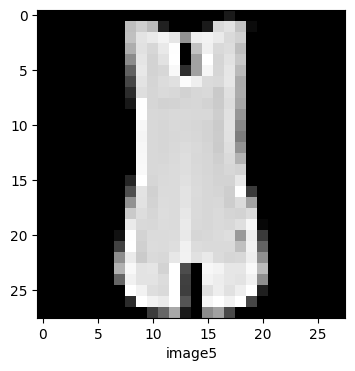

In [33]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
nb_images=0;

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=1,
                                     shuffle=False):
    plt.figure(figsize=(4,4))
    plt.imshow(X_batch.reshape(28,28), cmap=plt.get_cmap("gray"))
    plt.xlabel('image'+str(nb_images+1))
    plt.show()
    nb_images+=1
    if nb_images >= 5:
      break

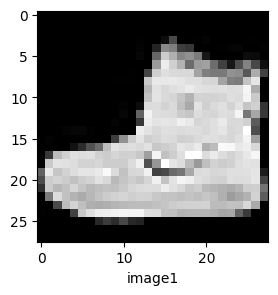

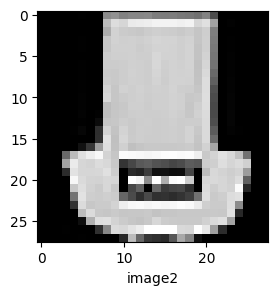

In [34]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
nb_images=0;

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=1,
                                     shuffle=False,
                                     save_to_dir='.',
                                     save_prefix='augmente',
                                     save_format='png'):
    plt.figure(figsize=(3,3))
    plt.imshow(X_batch.reshape(28,28), cmap=plt.get_cmap("gray"))
    plt.xlabel('image'+str(nb_images+1))
    plt.show()
    nb_images+=1
    if nb_images >= 2:
      break

In [ ]:
 # pour vérifier que l'image existe dans le répertoire
%ls *.png

 Le volume dans le lecteur D s'appelle Disk2
 Le num�ro de s�rie du volume est 9E48-2B35

 R�pertoire de d:\TER\deeplearning-TER\TER\phaseI


 R�pertoire de d:\TER\deeplearning-TER\TER\phaseI

07/02/26  15:28               580 augmente_0_2316.png
07/02/26  15:28               578 augmente_1_3743.png
               2 fichier(s)            1�158 octets
               0 R�p(s)  1�936�940�793�856 octets libres


In [ ]:
flow_from_directory(
  directory,               # Répertoire contenant les sous-dossiers avec les images pour chaque classe.
  target_size=(256, 256),  # Taille des images après redimensionnement (largeur, hauteur).
  color_mode='rgb',        # Mode couleur des images : 'rgb', 'grayscale', etc.
  classes=None,            # Liste des classes à considérer (facultatif, toutes les classes sont utilisées par défaut).
  class_mode='categorical',# Type d'encodage des étiquettes : 'categorical', 'binary', 'sparse', ou 'input'.
  batch_size=32,           # Taille du batch à générer (nombre d'échantillons par batch).
  shuffle=True,            # Indique si les échantillons doivent être mélangés (True) ou non (False).
  seed=None,               # Valeur de départ pour la génération aléatoire, utile pour la reproductibilité.
  save_to_dir=None,        # Répertoire dans lequel les images générées seront sauvegardées (facultatif).
  save_prefix='',          # Préfixe à ajouter aux noms des fichiers d'images sauvegardées.
  save_format='png',       # Format d'image dans lequel les images seront sauvegardées (par défaut, 'png').
  follow_links=False        # Indique si les liens symboliques doivent être suivis (True) ou non (False).
)

```python
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
```

In [38]:
def train_cnn_model(model, train_generator, val_data, model_path,
                    epochs=10, patience=3):
    """
    Entraîne un modèle CNN avec un générateur de données et des callbacks.

    Args:
        model: Modèle CNN à entraîner.
        train_generator: Générateur d’images pour l'entraînement.
        val_data: Données de validation (X_test, y_test).
        model_path (str): Chemin de sauvegarde du modèle.
        epochs (int): Nombre d’époques d'entraînement.
        patience (int): Patience pour l'arrêt anticipé.

    Returns:
        Modèle entraîné avec les meilleurs poids restaurés.
    """
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=patience,
                      restore_best_weights=True, verbose=1),
        ModelCheckpoint(model_path, monitor='val_loss',
                        save_best_only=True, verbose=1)
    ]

    model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_data,
        callbacks=callbacks,
        verbose=1
    )

    return model

# Paramètres d'entraînement
epochs = 20
batch_size = 64
model_filename = "CNN_ImageGenerator_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename)

# Chargement et normalisation du jeu de données
X_train, y_train, X_test, y_test = load_dataset()
X_train, X_test = clean_data(X_train, X_test)

# Définition du modèle
model = define_model()
print(model.summary())

# Générateur de données avec transformations
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

# Entraînement du modèle
#model = train_cnn_model(model, train_generator,
#                          (X_test, y_test), model_path, epochs=epochs)

Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None


313/313 - 2s - 6ms/step - accuracy: 0.8273 - loss: 0.4756
Loss sur le jeu de test : 0.4756
Accuracy sur le jeu de test : 82.73%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


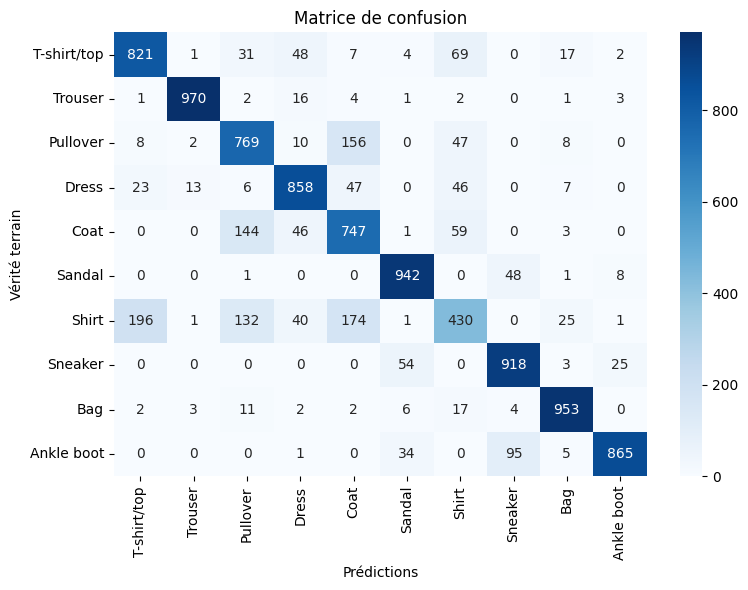

In [39]:
model_filename = "CNN_ImageGenerator_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename)

# Chargement du modèle sauvegardé
model = load_model(model_path)

# Évaluation du modèle sur le jeu de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Affichage des résultats de test
print(f'Loss sur le jeu de test : {test_loss:.4f}')
print(f'Accuracy sur le jeu de test : {test_acc * 100:.2f}%')

# Prédiction sur le jeu de test
y_pred = model.predict(X_test)

# Calcul de la matrice de confusion
conf = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.tight_layout()
plt.show()

## Affichage feature maps

In [40]:
def define_model(shapeinput=(28, 28, 1)):
    # Couche d'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # Convolution + pooling (1)
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="Conv2D_1")(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name="Maxpooling2D_1")(x)

    # Convolution + pooling (2)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="Conv2D_2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="Maxpooling2D_2")(x)

    # Convolution (3)
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name="Conv2D_3")(x)

    # Flatten + classification
    x = Flatten(name="flatten")(x)
    x = Dense(100, activation='relu', name="Dense_1")(x)
    outputs = Dense(10, activation='softmax', name="Output")(x)

    model = Model(inputs=inputs, outputs=outputs, name="CNN_for_FeatureMaps")

    # Compilation
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [41]:
def train_cnn_model(model, X_train, y_train, X_test, y_test,
                    model_path, epochs=10, batch_size=32, patience=3):
    """
    Entraîne un modèle CNN sur des images avec callbacks.

    Args:
        model: Modèle Keras compilé.
        X_train, y_train: Données d'entraînement.
        X_test, y_test: Données de validation.
        model_path (str): Chemin de sauvegarde du meilleur modèle.
        epochs (int): Nombre maximal d'époques.
        batch_size (int): Taille des mini-batchs.
        patience (int): Patience pour l'arrêt anticipé.

    Returns:
        Le modèle entraîné avec les meilleurs poids restaurés.
    """
    # Générateur sans transformation (modifiable si besoin)
    datagen = ImageDataGenerator()
    train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=patience,
                      restore_best_weights=True, verbose=1),
        ModelCheckpoint(filepath=model_path,
                        monitor='val_loss',
                        save_best_only=True,
                        verbose=1)
    ]

    model.fit(
        train_generator,
        validation_data=(X_test, y_test),
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model

In [42]:
# Paramètres
epochs = 10
batch_size = 32
model_filename = "CNN_forfeaturemaps_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename)

# Chargement et préparation des données
X_train, y_train, X_test, y_test = load_dataset()
X_train, X_test = clean_data(X_train, X_test)

# Définition du modèle
model = define_model()
print(model.summary())

# Générateur de données avec quelques transformations simples si souhaité
datagen = ImageDataGenerator()
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

#model = train_cnn_model(model, X_train, y_train, X_test, y_test, model_path)

Model: "CNN_for_FeatureMaps"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling2D_2 (MaxPooling2D)   │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,982 (816.34 KB)

 Trainable params: 208,982 (816.34 KB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
# Chargement du modèle
model_filename = "CNN_forfeaturemaps_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename)
model_loaded = load_model(model_path)

# Affichage du nombre de couches
print("Le modèle contient", len(model_loaded.layers), "couches.\n")

# Création d'une entrée factice pour initialiser les dimensions
dummy_input = np.zeros((1, 28, 28, 1))
_ = model_loaded.predict(dummy_input)

# Affichage des noms des couches
print("Noms des couches :")
for name in model_loaded.layers:
    print("-", name.name)

# Affichage des dimensions de sortie de chaque couche
print("\nFormats des sorties des différentes couches :")
for i, layer in enumerate(model_loaded.layers):
    output_shape = layer.output.shape
    print(f"Layer [{i}] : {layer.name}, shape de sortie : {output_shape}")

Le modèle contient 9 couches.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Noms des couches :
- Input_Layer
- Conv2D_1
- Maxpooling2D_1
- Conv2D_2
- Maxpooling2D_2
- Conv2D_3
- flatten
- Dense_1
- Output

Formats des sorties des différentes couches :
Layer [0] : Input_Layer, shape de sortie : (None, 28, 28, 1)
Layer [1] : Conv2D_1, shape de sortie : (None, 26, 26, 32)
Layer [2] : Maxpooling2D_1, shape de sortie : (None, 13, 13, 32)
Layer [3] : Conv2D_2, shape de sortie : (None, 11, 11, 64)
Layer [4] : Maxpooling2D_2, shape de sortie : (None, 5, 5, 64)
Layer [5] : Conv2D_3, shape de sortie : (None, 3, 3, 128)
Layer [6] : flatten, shape de sortie : (None, 1152)
Layer [7] : Dense_1, shape de sortie : (None, 100)
Layer [8] : Output, shape de sortie : (None, 10)


In [44]:
# Création d’un modèle pour extraire les feature maps de la première couche de convolution
feature_map_layer1 = tf.keras.models.Model(
    inputs=model_loaded.input,                     # Entrée d'origine du modèle
    outputs=model_loaded.get_layer("Conv2D_1").output  # Sortie de la couche nommée "Conv2D_1"
)

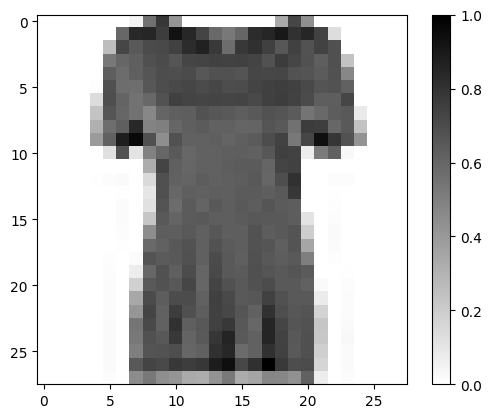

In [45]:
numimage = 10
plt.figure()
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Sélection de l'image
my_image = train_images[numimage]

# Extension des dimensions pour manipuler une seule image
my_image = np.expand_dims(my_image, axis=0)

In [46]:
features=feature_map_layer1.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [47]:
print (features.shape)

(1, 26, 26, 32)


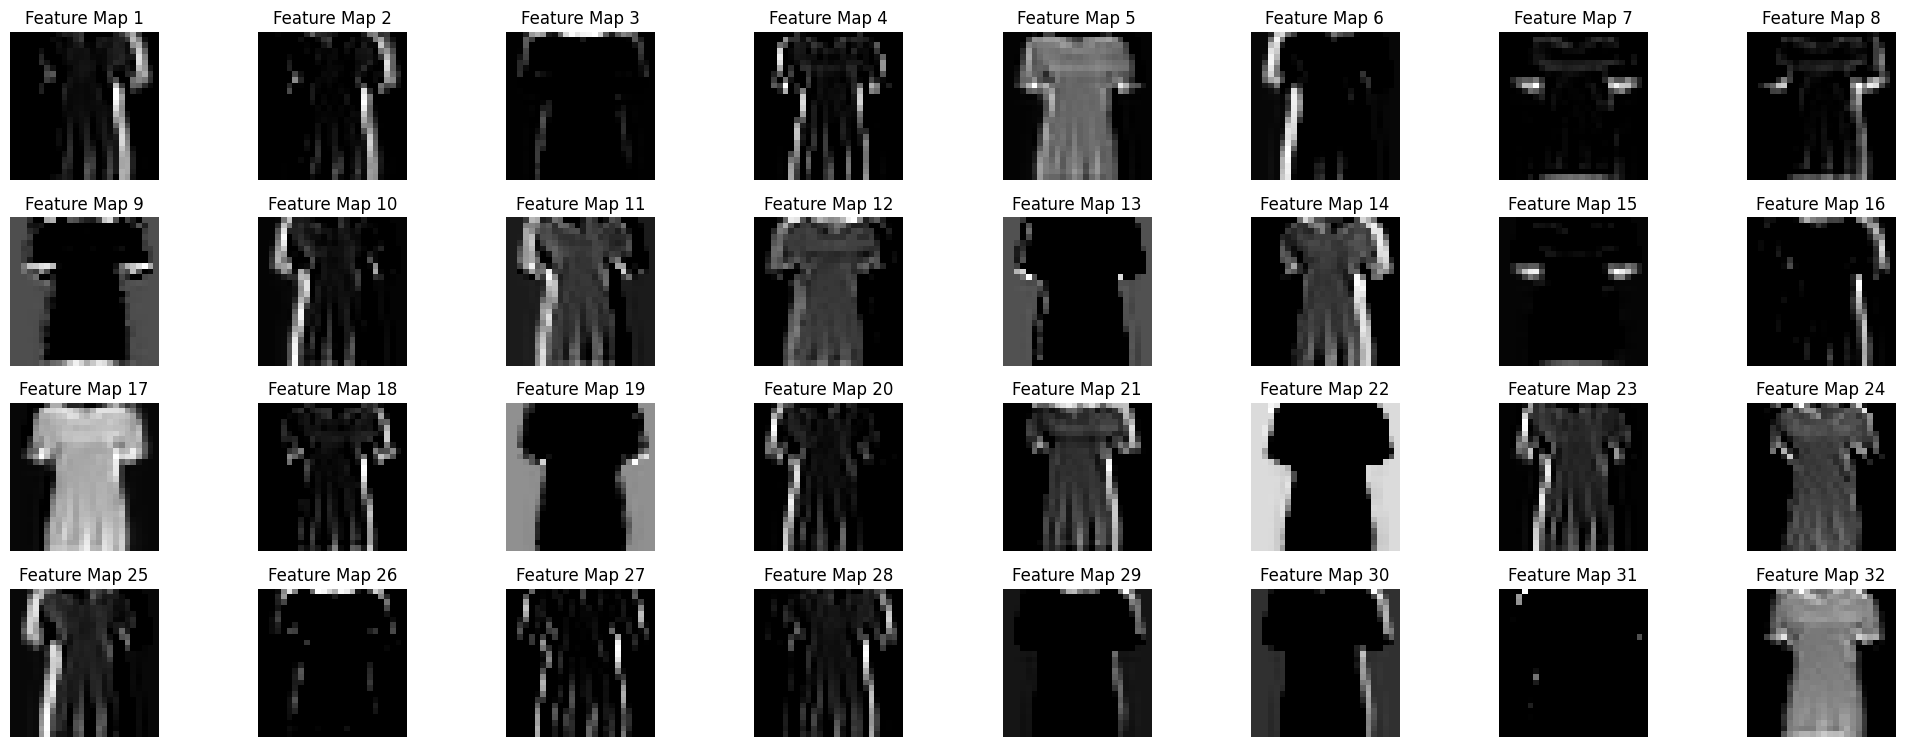

In [48]:
fig = plt.figure(figsize=(20, 15))

# Afficher chaque feature map
for i in range(1, features.shape[3] + 1):
    ax = plt.subplot(8, 8, i)
    ax.imshow(features[0, :, :, i - 1], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Feature Map {i}')

# Afficher toutes les feature maps
plt.tight_layout()
plt.show()

In [49]:
# Noms des couches de convolution à visualiser
list_layer_conv = ["Conv2D_1", "Conv2D_2", "Conv2D_3"]

# Récupération des sorties de ces couches
outputs = [model_loaded.get_layer(name).output for name in list_layer_conv]

# Création d’un modèle intermédiaire pour extraire les activations
feature_maps_model = tf.keras.models.Model(inputs=model_loaded.input, outputs=outputs)

# Prédiction des feature maps pour une image donnée (de forme (1, 28, 28, 1))
feature_maps = feature_maps_model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


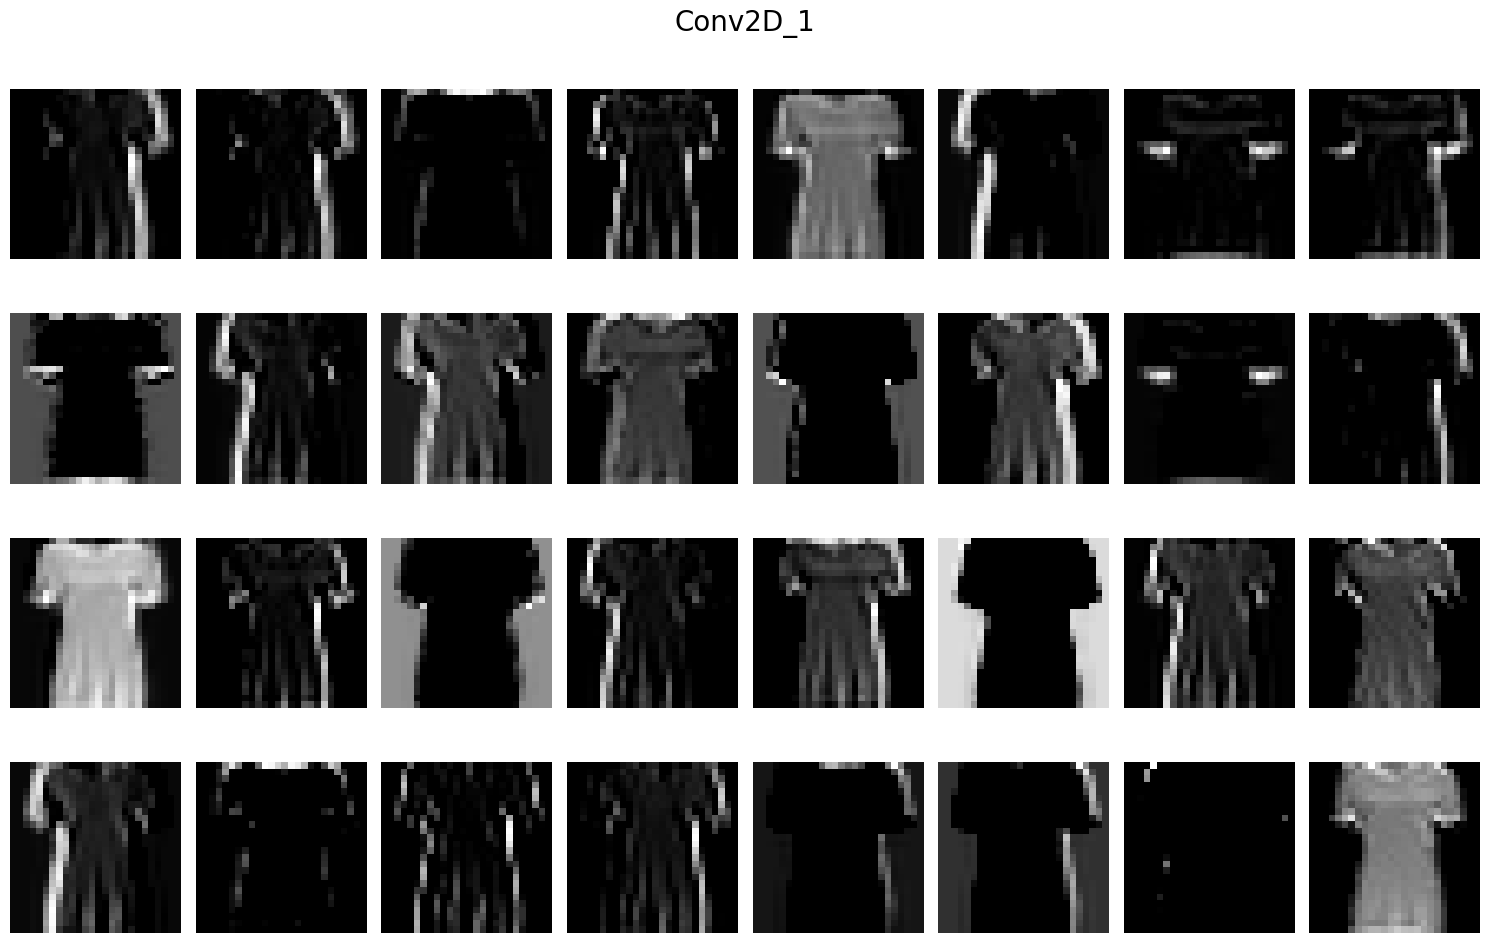

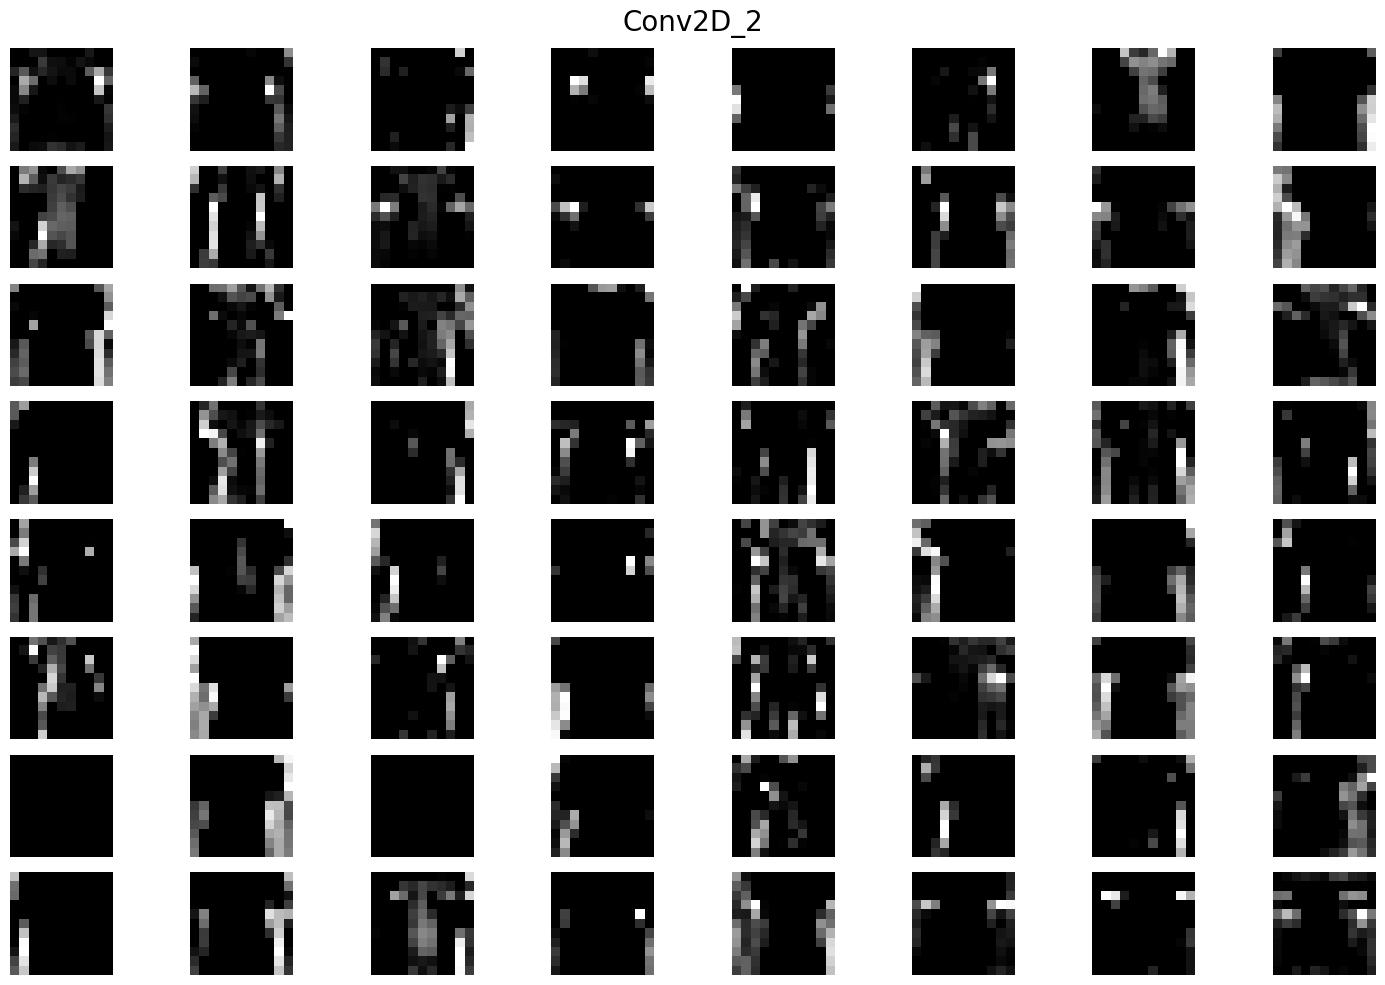

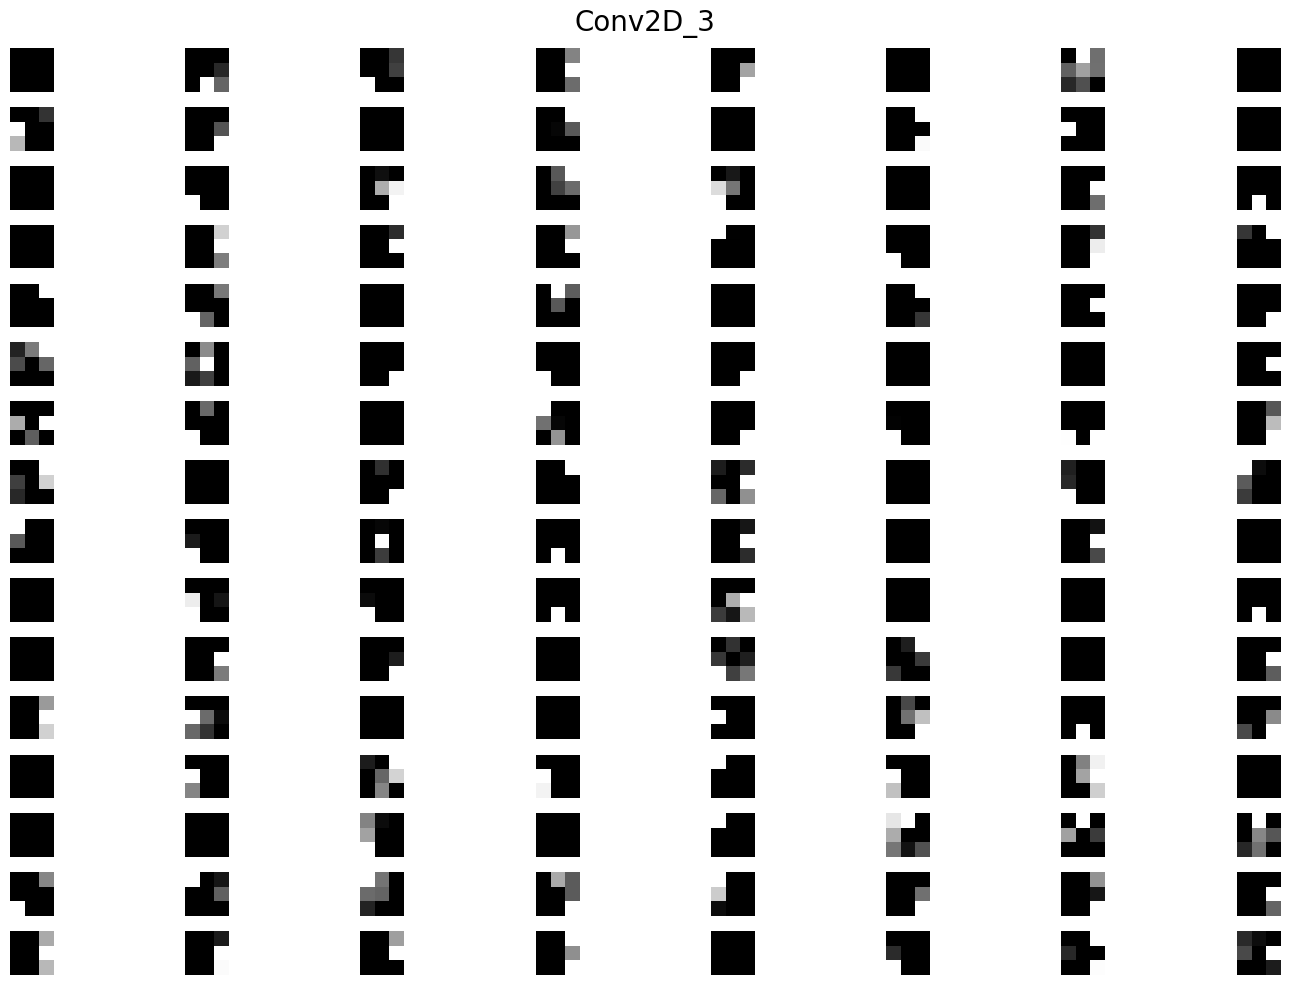

In [50]:
# Affichage des feature maps pour chaque couche de convolution sélectionnée
for layer_name, fmap in zip(list_layer_conv, feature_maps):
    # Création d'une figure pour la couche en cours
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(layer_name, fontsize=20)

    num_feature_maps = fmap.shape[-1]  # Nombre de cartes d’activation
    cols = 8  # Nombre de colonnes
    rows = (num_feature_maps // cols) + (num_feature_maps % cols > 0)

    for j in range(num_feature_maps):
        plt.subplot(rows, cols, j + 1)
        plt.imshow(fmap[0, :, :, j], cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Transfer Learning
ResNet50 a été entraîné sur le jeu de données ImageNet, composé d'images couleur haute résolution. On ne doit donc pas s'attendre à des performances optimales lorsqu'il est appliqué à des images de résolution plus faible ou en niveaux de gris, comme celles de Fashion MNIST. L'objectif ici est avant tout de montrer comment exploiter un modèle pré-entraîné dans un autre contexte, même si ce n'est pas celui pour lequel il a été initialement conçu.

In [51]:
model_resnet50=ResNet50()
model_resnet50.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [61]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [62]:
# Prendre les 1000 premières images et leurs étiquettes
X_train = X_train[:1000]  # Prendre les 1000 premières images
y_train = y_train[:1000]   # Prendre les 1000 premières étiquettes

In [63]:
# Redimensionner les images à 28x28 et ajouter une dimension de canaux (1 pour grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normaliser les images entre 0 et 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Conversion en 3 canaux (grayscale à RGB)
X_train = np.concatenate([X_train, X_train, X_train], axis=-1)  # Convertir en 3 canaux
X_test = np.concatenate([X_test, X_test, X_test], axis=-1)      # Convertir en 3 canaux

# One-hot encoding des labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print ("X_train et X_test en image 28x28 et 3 canaux : ", X_train.shape, ' ', X_test.shape)

X_train et X_test en image 28x28 et 3 canaux :  (1000, 28, 28, 3)   (10000, 28, 28, 3)


 Pour préparer nos images au format requis, nous devons les convertir de 28x28 à 224x224 pixels. Dans les usages classiques du transfer learning, les images sont souvent stockées sur disque, ce qui permet de les redimensionner à la volée au moment du chargement. Ici, comme les images sont déjà en mémoire sous forme de tableaux NumPy, nous devons effectuer ce redimensionnement dans le flux de traitement du modèle.Une solution simple consiste à intégrer directement dans l'architecture une couche Lambda, qui redimensionnera dynamiquement chaque image de 28x28 à 224x224.
 ````python 
 tf.keras.layers.Lambda(
    function,               # Fonction définie pour transformer l'entrée (ici, redimensionner l'image).
    output_shape=None,      # Shape de sortie attendu de la fonction (peut être None si inférable).
    mask=None,              # Masque à appliquer pour l'entraînement (facultatif).
    arguments=None,         # Arguments supplémentaires passés à la fonction (sous forme de dictionnaire).
    name=None,              # Nom de la couche (facultatif).
    dtype=None              # Type de données attendu (inféré automatiquement si None).
)
````


>Remarque : > les fonctions lambda utilisées dans une couche Lambda ne sont pas sérialisables par défaut. Cela signifie que le modèle ne pourra pas être rechargé avec load_model(...) sans générer une erreur. Cette restriction est imposée par Keras pour des raisons de sécurité, afin d'éviter l'exécution de code arbitraire lors du chargement d'un modèle. Pour contourner ce problème, il est recommandé d'utiliser une fonction nommée décorée avec @tf.keras.utils.register_keras_serializable(). Dans notre cas, nous définissons une fonction resize_to_resnet, que nous appelons directement dans la couche Lambda pour assurer la compatibilité avec la sauvegarde et le rechargement du modèle.

Nous allons maintenant créer un modèle qui intègre ResNet50, en y ajoutant une couche de classification personnalisée adaptée à notre tâche. Pour cela, nous réutilisons l'architecture de ResNet50 sans sa dernière couche de classification, grâce au paramètre include_top=False. Cette option permet de conserver uniquement les couches convolutionnelles du modèle.Le paramètre pooling='avg' applique une moyenne globale sur les feature maps produites par la dernière couche convolutionnelle, ce qui permet de réduire la sortie à un vecteur fixe, utilisable comme entrée d'un MLP. Les poids utilisés sont ceux entraînés sur ImageNet, spécifiés par weights='imagenet'.Voici la ligne correspondante en code :
 ````python
 ResNet50(include_top=False, pooling='avg', weights='imagenet')
````
 
>Remarque : en précisant weights='imagenet', nous importons les poids pré-entraînés sur le jeu de données ImageNet. Ce dataset, utilisé notamment dans le cadre de la compétition ImageNet Large Scale Visual Recognition Challenge (ILSVRC), contient plusieurs millions d'images réparties sur un millier de classes.

Le modèle peut maintenant être défini :

In [64]:
# Dimensions d'entrée
input_shape_mnist = (28, 28, 3)
input_shape_resnet = (224, 224, 3)

# Fonction sérialisable pour le redimensionnement
@tf.keras.utils.register_keras_serializable()
def resize_to_resnet(image):
    return tf.image.resize(image, input_shape_resnet[:2])

# Définir l'entrée
inputs = Input(shape=input_shape_mnist, name="Input_Layer")

# Redimensionnement des images
x = Lambda(resize_to_resnet, name="Lambda_Layer")(inputs)

# Importation de ResNet50 sans la couche finale
base_model = ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    name="ResNet_Layer"
)
base_model.trainable = False  # Geler les poids

# Application de ResNet50
x = base_model(x)

# Partie classification personnalisée
x = Dense(512, activation='relu', name="Dense1_Layer")(x)
outputs = Dense(10, activation='softmax', name="Output_Layer")(x)

# Construction du modèle
model = Model(inputs=inputs, outputs=outputs)

# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Lambda_Layer (Lambda)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ResNet_Layer (Functional)       │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1_Layer (Dense)            │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [65]:
# Afficher les couches entraînables du modèle
print("Couches entraînables dans le modèle :")
for layer in model.layers:
    if layer.trainable:
        print(f"{layer.name} ({layer.__class__.__name__})")

Couches entraînables dans le modèle :
Input_Layer (InputLayer)
Lambda_Layer (Lambda)
Dense1_Layer (Dense)
Output_Layer (Dense)


In [66]:
# Division du jeu d'entraînement en sous-ensembles entraînement et validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Générateur simple de données à partir de tableaux NumPy en mémoire
def simple_data_generator(X, y, batch_size):
    """
    Génère des lots de données (X, y) de taille batch_size.
    Fonctionne en boucle infinie pour être compatible avec model.fit().
    """
    num_samples = len(X)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = X[offset:offset + batch_size]
            batch_y = y[offset:offset + batch_size]
            yield batch_x, batch_y

In [67]:
def train_transfer_model(model,
                         train_generator,
                         val_generator,
                         steps_per_epoch,
                         validation_steps,
                         model_path,
                         epochs=40,
                         patience=5):
    """
    Entraîne un modèle avec transfer learning à partir de générateurs.

    Args:
        model: Modèle Keras compilé.
        train_generator: Générateur d'entraînement.
        val_generator: Générateur de validation.
        steps_per_epoch (int): Nombre de lots par époque.
        validation_steps (int): Nombre de lots pour la validation.
        model_path (str): Chemin de sauvegarde du meilleur modèle.
        epochs (int): Nombre d'époques.
        patience (int): Patience pour l'arrêt anticipé.

    Returns:
        Le modèle entraîné avec les meilleurs poids restaurés.
    """
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=patience,
                      restore_best_weights=True, verbose=1),
        ModelCheckpoint(filepath=model_path, monitor='val_loss',
                        save_best_only=True, verbose=1)
    ]

    model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_generator,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model

# Paramètres
epochs = 40
batch_size = 32
model_filename_transfer = "CNN_transferlearning_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename_transfer)

# Générateurs
train_generator = simple_data_generator(X_train_split, y_train_split,
                                        batch_size)
val_generator = simple_data_generator(X_val_split, y_val_split, batch_size)

# Calcul des steps
steps_per_epoch = int(np.ceil(len(X_train_split) / batch_size))
validation_steps = int(np.ceil(len(X_val_split) / batch_size))

# Entraînement
#model = train_transfer_model(
#    model,
#    train_generator,
#    val_generator,
#    steps_per_epoch,
#    validation_steps,
#    model_path,
#    epochs=epochs,
#    patience=5
#)

313/313 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step


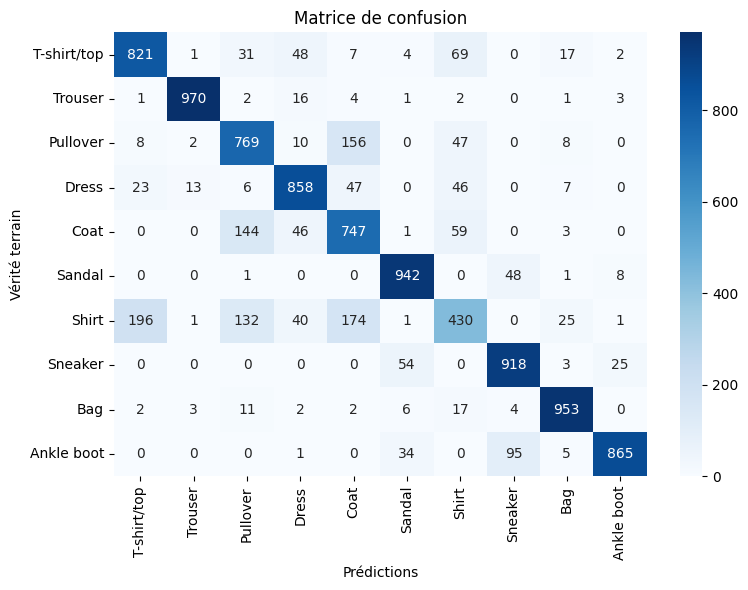

In [68]:
# Chargement du modèle sauvegardé
model_filename = "CNN_transferlearning_modelFMnist.keras"
model_path = os.path.join(model_dir, model_filename)
model = load_model(model_path)

# Prédiction
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Conversion de y_test
y_true_labels = np.argmax(y_test, axis=1)

# Matrice de confusion
confusion_matrix(y_true_labels, y_pred_labels)


# Affichage
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.tight_layout()
plt.show()

Bizarrement, on a EXACTEMENT le même tableau que à la fin de ImageDataGenerator. Ou pas si bizarement que ça en fait...